# Problem Statement:

## Problem 1: Prediction task is to determine whether a person makes over 50K a year.

### The description of the dataset is as follows:

<p><b>Data Set Information:</b></p>
<p>Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))</p>
<p><b>Attribute Information:</b></p>
<p>Listing of attributes: &lt;50K, &gt;=50K.</p>
<p>age: continuous. </p>
<p>workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.</p>
<p>fnlwgt: continuous.</p>
<p>education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc,9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.</p>
<p>education-num: continuous.</p>
<p>marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.</p>
<p>occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial,Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing,</p>
<p>Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.</p>
<p>relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.</p>
<p>race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.</p>
<p>sex: Female, Male.</p>
<p>capital-gain: continuous.</p>
<p>capital-loss: continuous.</p>
<p>hours-per-week: continuous.</p>
<p>native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala,Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands</p>

## Importing Modules 

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import operator
from xgboost import plot_tree
from sklearn.metrics import accuracy_score
from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/srv/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/srv/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/srv/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/srv/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/srv/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.

## Loading Data

In [2]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status','occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week','native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

## Data Exploration/Analysis

In [3]:
train_set.head() #Returns the first 5 rows of train_set dataframe

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
test_set.head() #Returns the first 5 rows of test_set dataframe

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
train_set.info() #Prints information about train_set dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
test_set.info() #Prints information about test_set dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education_num     16281 non-null int64
marital_status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital_gain      16281 non-null int64
capital_loss      16281 non-null int64
hours_per_week    16281 non-null int64
native_country    16281 non-null object
wage_class        16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [7]:
train_set.describe() #The summary statistics of the train_set dataframe

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
test_set.describe() #The summary statistics of the test_set dataframe

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [9]:
train_set.isnull().values.any() #Check for any NA’s in the dataframe.

False

In [10]:
test_set.isnull().values.any() #Check for any NA’s in the dataframe.

False

In [11]:
train_set['workclass'].value_counts() #Returns object containing counts of unique values

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [12]:
train_set['occupation'].value_counts() #Returns object containing counts of unique values

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [13]:
train_set['native_country'].value_counts() #Returns object containing counts of unique values

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

## Data Visualization

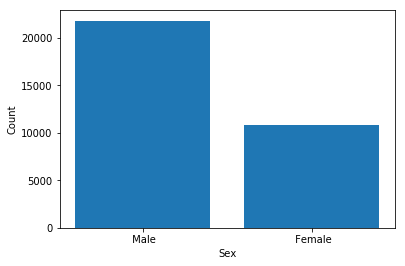

In [14]:
#The distribution of gender in the train_set dataset.  
fig, ax = plt.subplots()  
x = train_set.sex.unique()  
#Counting 'Males' and 'Females' in the dataset  
y = train_set.sex.value_counts()  
#Plotting the bar graph  
ax.bar(x, y)  
ax.set_xlabel('Sex')  
ax.set_ylabel('Count')  
plt.show() 

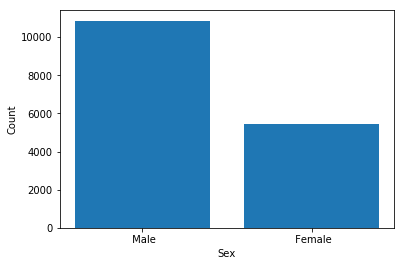

In [15]:
#The distribution of gender in the train_set dataset.  
fig, ax = plt.subplots()  
x = test_set.sex.unique()  
#Counting 'Males' and 'Females' in the dataset  
y = test_set.sex.value_counts()  
#Plotting the bar graph  
ax.bar(x, y)  
ax.set_xlabel('Sex')  
ax.set_ylabel('Count')  
plt.show() 

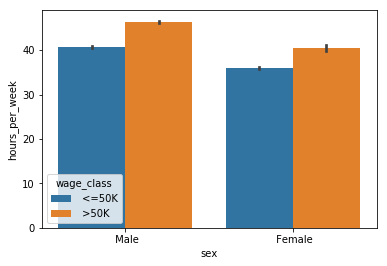

In [16]:
#Bar plot for males and females with wage_class less than 50K tend to work more per week.   
sns.barplot(train_set.sex, train_set['hours_per_week'], hue=train_set['wage_class'])  
plt.show()

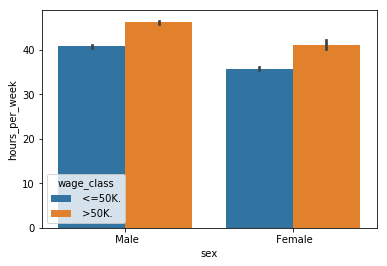

In [17]:
#Bar plot for males and females with wage_class less than 50K tend to work more per week.   
sns.barplot(test_set.sex, test_set['hours_per_week'], hue=test_set['wage_class'])  
plt.show()

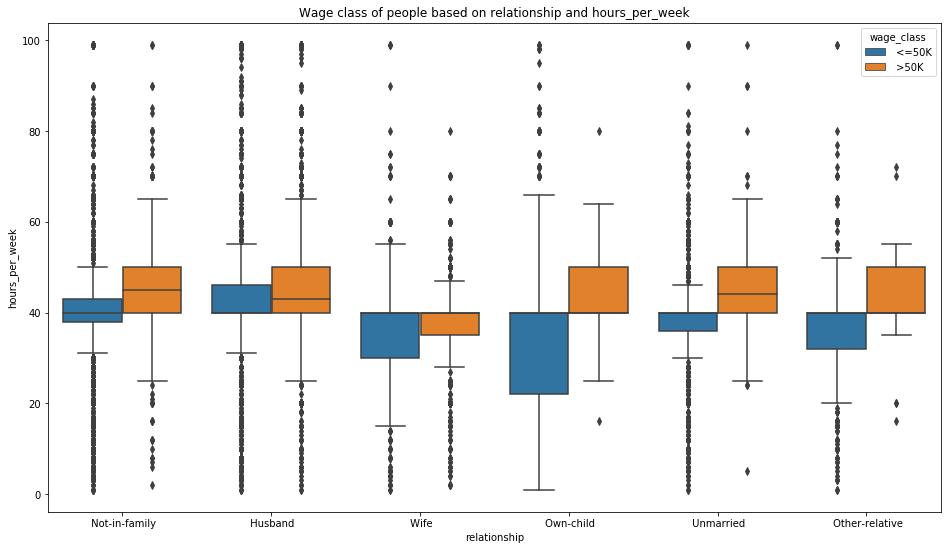

In [18]:
#Creating a box plot for train_set
fig, ax = plt.subplots(figsize=(16, 9))  
sns.boxplot(x='relationship', y='hours_per_week', hue='wage_class', data=train_set, ax=ax)  
ax.set_title('Wage class of people based on relationship and hours_per_week')  
plt.show()

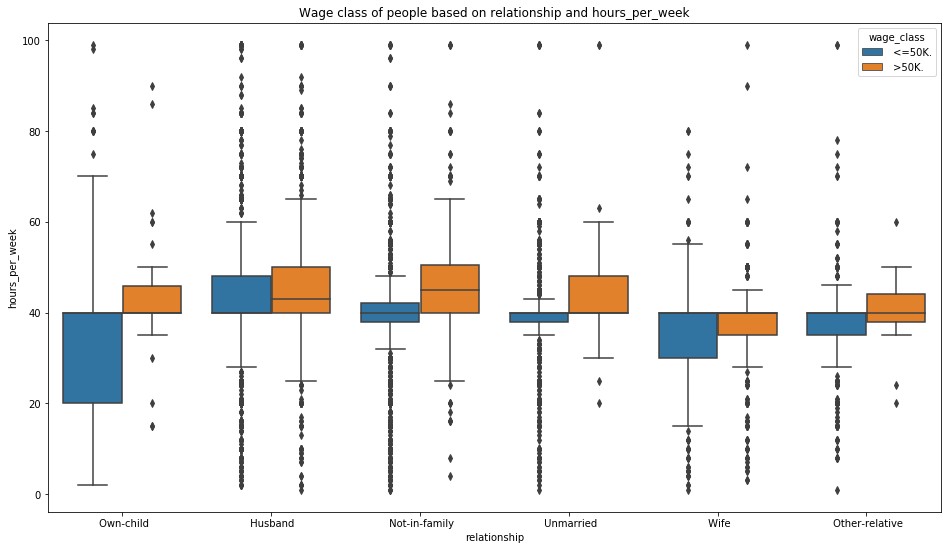

In [19]:
#Creating a box plot for test_set
fig, ax = plt.subplots(figsize=(16, 9))  
sns.boxplot(x='relationship', y='hours_per_week', hue='wage_class', data=test_set, ax=ax)  
ax.set_title('Wage class of people based on relationship and hours_per_week')  
plt.show()

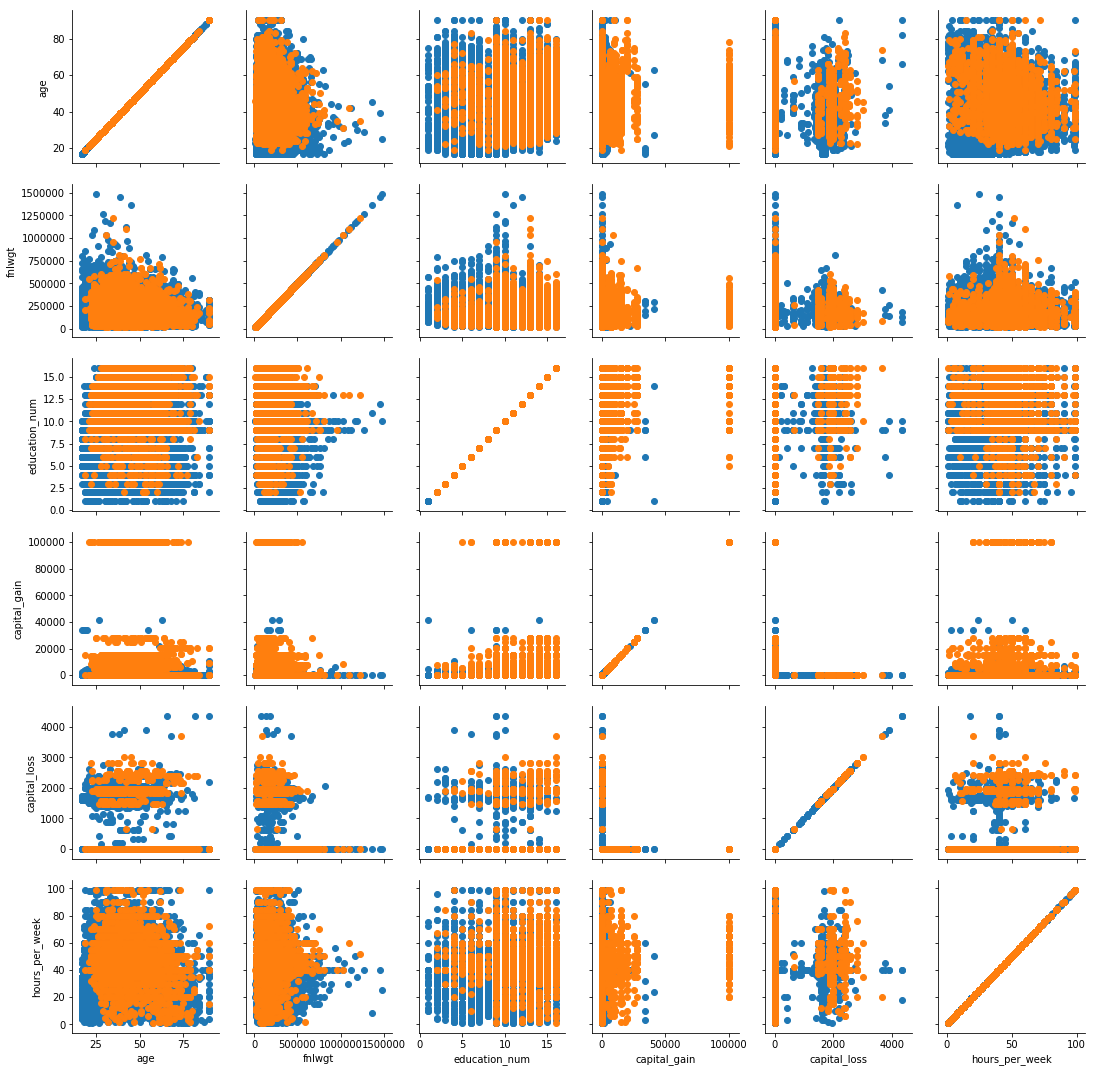

In [20]:
#Creating a scatter plots for all pairs of variables of train_set.
pg = sns.PairGrid(data=train_set, hue='wage_class')
pg.map(plt.scatter) 

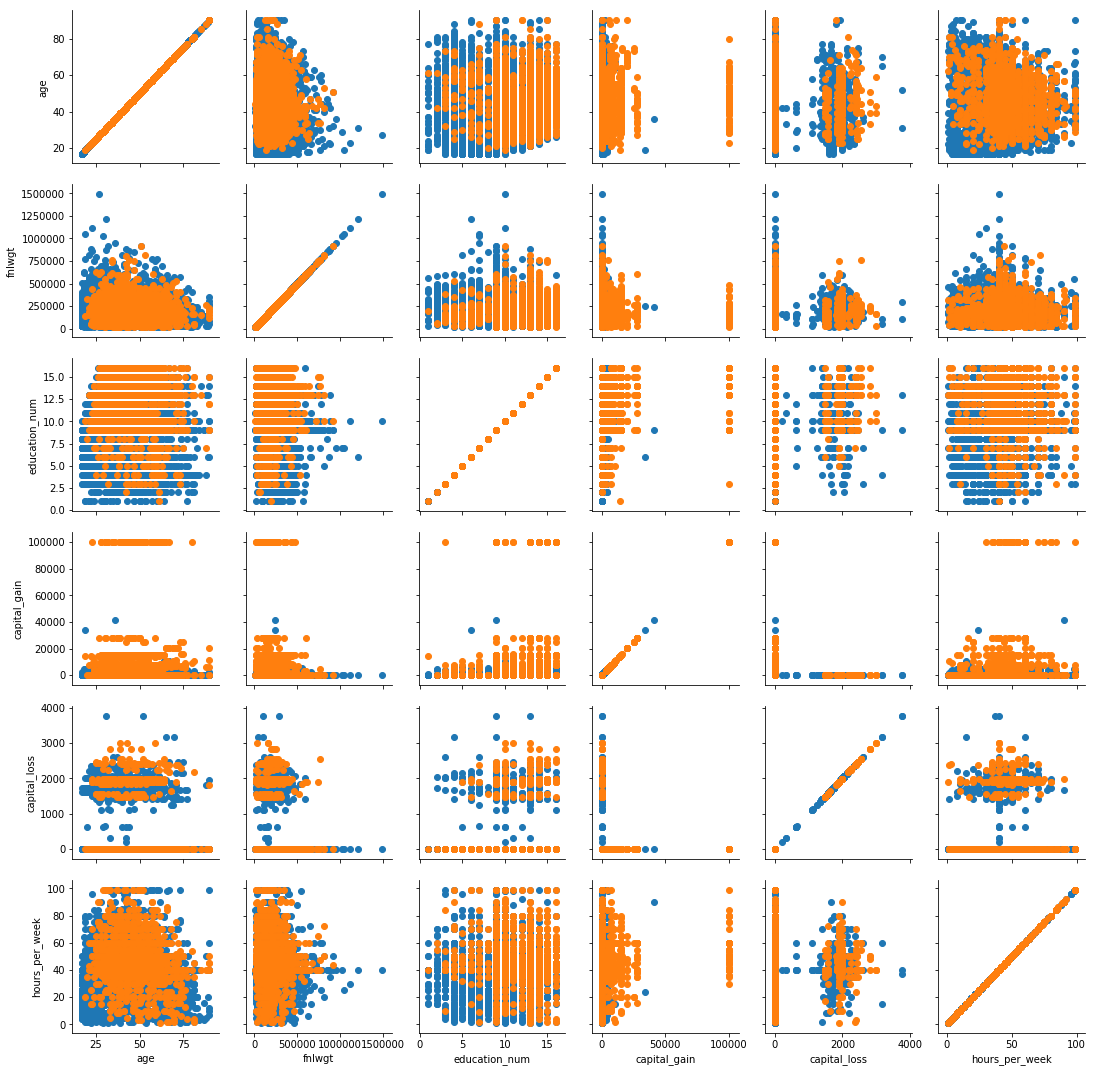

In [21]:
#Creating a scatter plots for all pairs of variables of test_set.
pg = sns.PairGrid(data=test_set, hue='wage_class')
pg.map(plt.scatter)

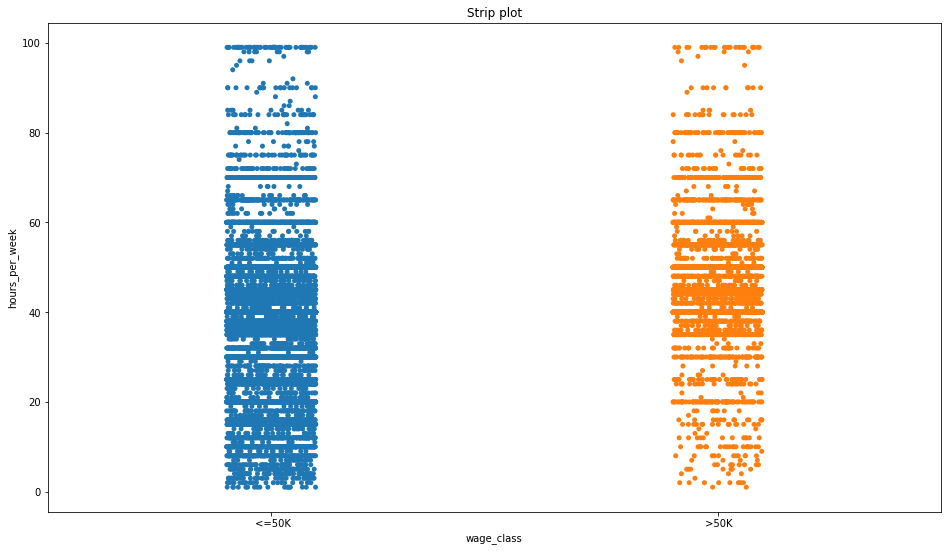

In [22]:
#Using Strip plot to visualize the train_set.  
fig, ax= plt.subplots(figsize=(16, 9))  
sns.stripplot(train_set['wage_class'], train_set['hours_per_week'], jitter=True, ax=ax)  
ax.set_title('Strip plot')  
plt.show()  

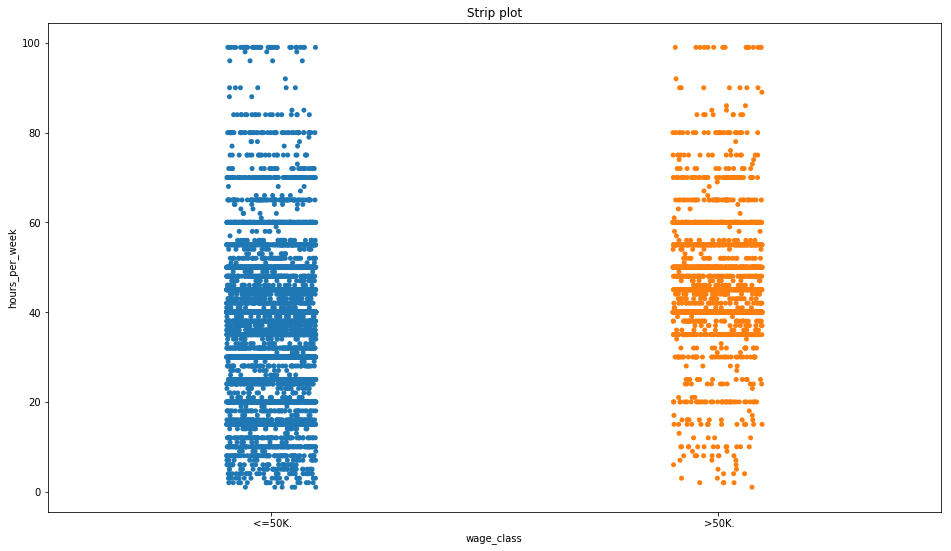

In [23]:
#Using Strip plot to visualize the test_set.  
fig, ax= plt.subplots(figsize=(16, 9))  
sns.stripplot(test_set['wage_class'], test_set['hours_per_week'], jitter=True, ax=ax)  
ax.set_title('Strip plot')  
plt.show()  

## Data Cleaning

### Replacing ' ?' with NaN

In [24]:
train_set_new = train_set.replace({' ?':np.nan}) #Replaces ' ?' with NaN

In [25]:
train_set_new.isnull().values.any() #Check for any NA’s in the dataframe.

True

In [26]:
train_set_new.isnull().sum() #Checks null values in dataframe and prints the sum

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
wage_class           0
dtype: int64

### Replcaing null values with 'unknown'

In [27]:
train_set_new.fillna('unknown', inplace=True) #Replaces null values with 'unknown'

In [28]:
train_set_new.isnull().values.any() #Check for any NA’s in the dataframe.

False

In [29]:
train_set_new.isnull().sum()  #Checks null values in dataframe and prints the sum column wise

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [30]:
test_set_new = test_set.replace({' ?':np.nan}) #Replaces ' ?' with NaN

In [31]:
test_set_new.isnull().values.any() #Check for any NA’s in the dataframe.

True

In [32]:
test_set_new.isnull().sum() #Checks null values in dataframe and prints the sum column wise

age                 0
workclass         963
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
wage_class          0
dtype: int64

In [33]:
test_set_new.fillna('unknown', inplace=True) #Replaces null values with 'unknown'

In [34]:
test_set_new.isnull().values.any() #Check for any NA’s in the dataframe.

False

In [35]:
test_set_new.isnull().sum() #Checks null values in dataframe and prints the sum column wise

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [36]:
train_set_new.head() #Returns the first 5 rows of train_set_new dataframe

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [37]:
test_set_new.head() #Returns the first 5 rows of test_set_new dataframe

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,unknown,103497,Some-college,10,Never-married,unknown,Own-child,White,Female,0,0,30,United-States,<=50K.


## Data Pre-Processing 

### Creating Features and Targets

In [38]:
#Removes column that I am trying to predict ('wage_class') from features list
train_features = train_set_new.drop('wage_class', axis=1)

#Creates train labels list
train_labels = (train_set_new['wage_class'] == ' >50K')

In [39]:
train_features.head() #Returns the first 5 rows of train_features dataframe

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [40]:
train_labels.unique() #Returns unique values of train_labels.

array([False,  True])

In [41]:
#Remove column that I am trying to predict ('wage_class') from features list
test_features = test_set_new.drop('wage_class', axis=1)

#Creates training labels list
test_labels = (test_set_new['wage_class'] == ' >50K.')

In [42]:
test_features.head() #Returns the first 5 rows of test_features dataframe

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,unknown,103497,Some-college,10,Never-married,unknown,Own-child,White,Female,0,0,30,United-States


In [43]:
test_labels.unique() #Return unique values of test_labels.

array([False,  True])

In [44]:
#Categorical columns contain data that need to be turned into numerical values before being used by XGBoost
CATEGORICAL_COLUMNS = (
    'workclass',
    'education',
    'marital_status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native_country'
)

In [45]:
CATEGORICAL_COLUMNS

('workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country')

In [46]:
#Converts data in categorical columns to numerical values
encoders = {col:LabelEncoder() for col in CATEGORICAL_COLUMNS}

for col in CATEGORICAL_COLUMNS:
    train_features[col] = encoders[col].fit_transform(train_features[col])
    test_features[col] = encoders[col].fit_transform(test_features[col])    

In [47]:
train_features.head() #Returns the first 5 rows of train_features dataframe

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4


In [48]:
test_features.head() #Returns the first 5 rows of test_features dataframe

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,37
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,37
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,37
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,37
4,18,8,103497,15,10,4,14,3,4,0,0,0,30,37


In [49]:
#Loads data into DMatrix object
dtrain = xgb.DMatrix(train_features, train_labels)
dtest = xgb.DMatrix(test_features)

In [50]:
print("Train dataset contains {0} rows and {1} columns".format(dtrain.num_row(), dtrain.num_col()))
print("Test dataset contains {0} rows and {1} columns".format(dtest.num_row(), dtest.num_col()))

Train dataset contains 32561 rows and 14 columns
Test dataset contains 16281 rows and 14 columns


In [51]:
print("Train possible labels: ")
print(np.unique(dtrain.get_label()))

print("\nTest possible labels: ")
print(np.unique(dtest.get_label()))

Train possible labels: 
[0. 1.]

Test possible labels: 
[]


## Creating and Training the Model

### Specify training parameters

In [52]:
#Specifies general training parameters
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': 1.0,
    'silent': 1,
    'n_estimators': 5
}

### Training classifier

In [53]:
bst = XGBClassifier(**params).fit(train_features, train_labels)

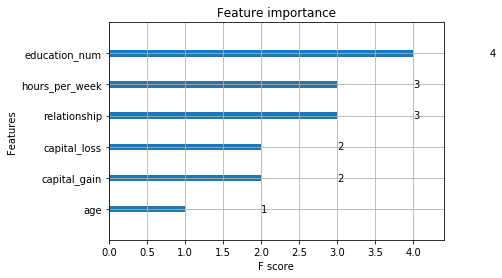

In [54]:
xgb.plot_importance(bst)

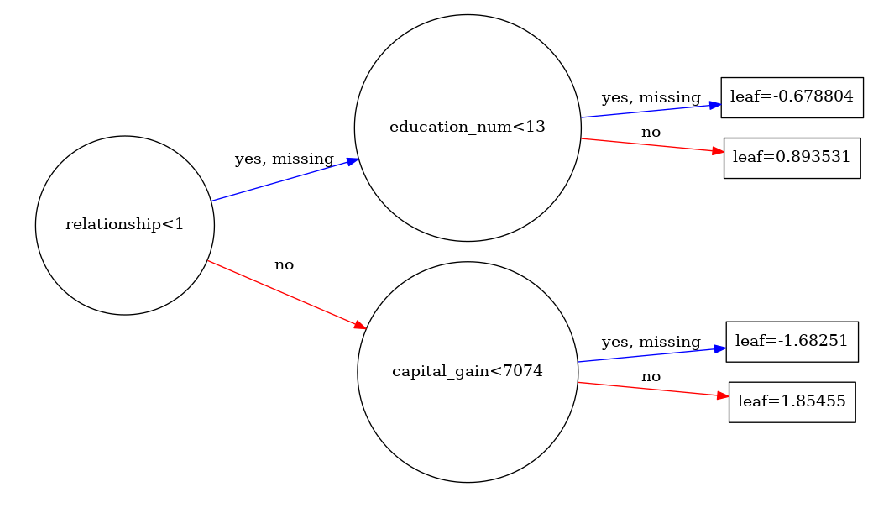

In [57]:
#Tree Plot of XGBoost Model for 1st boosted tree
xgb.plot_tree(bst, num_trees=0, rankdir='LR')
fig = plt.gcf()
fig.set_size_inches(15, 10)

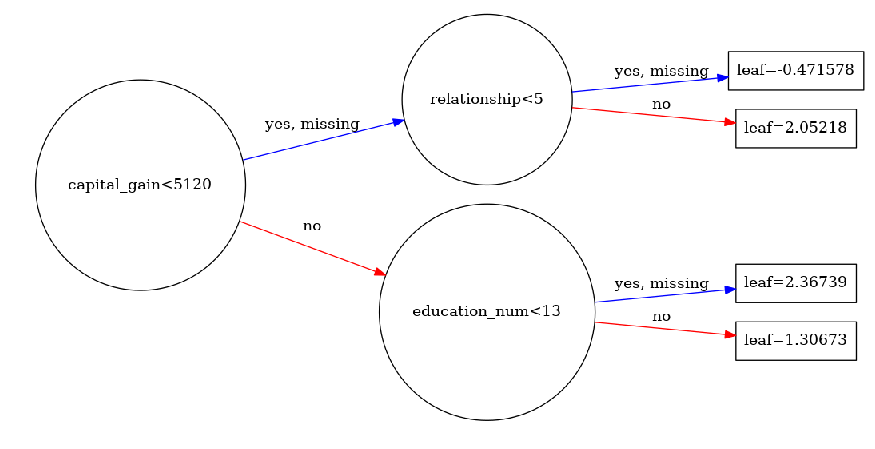

In [58]:
#Tree Plot of XGBoost Model for 2nd boosted tree
xgb.plot_tree(bst, num_trees=1, rankdir='LR')
fig = plt.gcf()
fig.set_size_inches(15, 10)

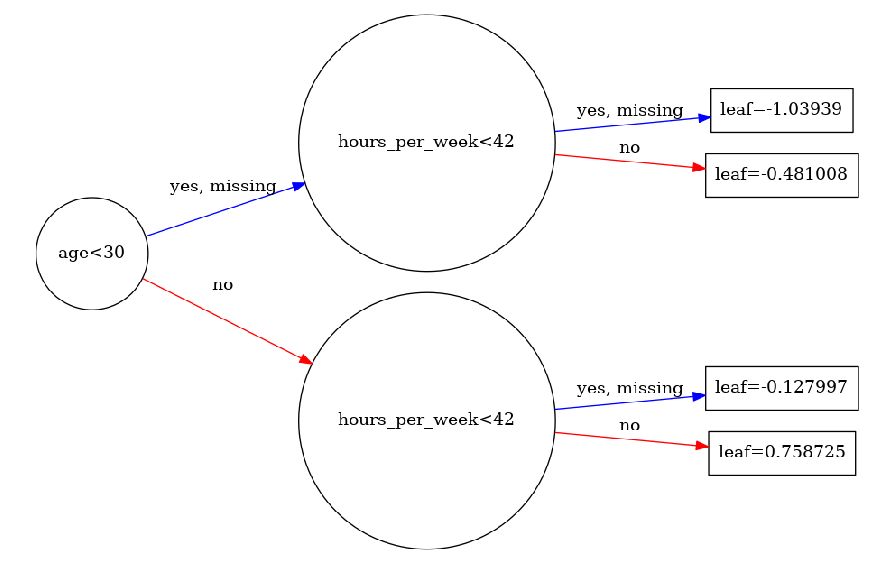

In [59]:
#Tree Plot of XGBoost Model for 3rd boosted tree
xgb.plot_tree(bst, num_trees=2, rankdir='LR')
fig = plt.gcf()
fig.set_size_inches(15, 10)

### Make predictions

In [55]:
preds_bst = bst.predict(test_features)
preds_bst

array([False, False, False, ...,  True, False,  True])

### Calculate obtained error

In [56]:
correct = 0

for i in range(len(preds_bst)):
    if (test_labels[i] == preds_bst[i]):
        correct += 1
        
acc = accuracy_score(test_labels, preds_bst)

print('Predicted correctly: {0}/{1}'.format(correct, len(preds_bst)))
print('Error: {0:.4f}'.format(1-acc))
print('Accuracy: {0:.2f}'.format(correct/len(preds_bst)))

Predicted correctly: 13838/16281
Error: 0.1501
Accuracy: 0.85


## Evaluate results

In [57]:
#Shows confusion matrix for actual and predicted values for wage_class
confusion_matrix(test_labels,preds_bst)

array([[11544,   891],
       [ 1552,  2294]])

In [58]:
#Shows accuracy score of the model
accuracy_score(test_labels,preds_bst)

0.8499477919046742

## Problem 1: Prediction task is to determine whether a person makes over 50K a year.




In [59]:
#Person is 25 years old, working as private job as Machine-op-inspct, Person is male, his education_num is 7
#He has passed 11th, his race is black, his capital gain and capital loss is 0,he Never-married
#He works 40 hours per week and his native country is United-States, his fnlwgt is 226802

wage_class_pred = bst.predict(pd.DataFrame(np.array([[25, 3, 226802, 1, 7, 4, 6, 3, 2, 1, 0, 0, 40, 37]]), columns=test_features.columns))
print("\nThe predicted wage_class is:",wage_class_pred[0] )

if wage_class_pred[0] == True:
  print("\nThis person makes over 50K a year.")
else:
  print("\nThis person doesn't makes over 50K a year.")


The predicted wage_class is: False

This person doesn't makes over 50K a year.


In [60]:
#Person is 35 years old, working as Self-emp-inc job as Exec-managerial, Person is male, his education_num is 13
#He has passed Bachelors, his race is white, his capital gain and capital loss is 0, his marital_status is Married-civ-spouse and he is husband
#He works 60 hours per week and his native country is United-States, his fnlwgt is 182148

wage_class_pred = bst.predict(pd.DataFrame(np.array([[35,	4,	182148,	9,	13,	2,	3,	0,	4,	1,	0,	0,	60,	37]]), columns=test_features.columns))
print("\nThe predicted wage_class is:",wage_class_pred[0] )

if wage_class_pred[0] == True:
  print("\nThis person makes over 50K a year.")
else:
  print("\nThis person doesn't makes over 50K a year.")


The predicted wage_class is: True

This person makes over 50K a year.


## Problem 2: Which factors are important

In [61]:
bst.feature_importances_

array([0.06666667, 0.        , 0.        , 0.        , 0.26666668,
       0.        , 0.        , 0.2       , 0.        , 0.        ,
       0.13333334, 0.13333334, 0.2       , 0.        ], dtype=float32)

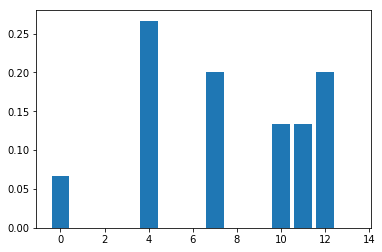

In [62]:
#Barplot
plt.bar(range(len(bst.feature_importances_)), bst.feature_importances_)
plt.show()

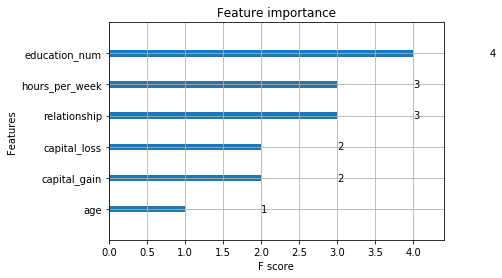

In [63]:
#Feature Importance Flot
xgb.plot_importance(bst)

## Problem 3: Which algorithms are best for this dataset

In [64]:
#Creating an empty dictionary
algorithm_score_dict ={}

### Logistic Regression



In [65]:
#Instantiating a logistic regression model, and fit with train_features and train_labels
lgr = LogisticRegression()
lgr.fit(train_features,train_labels)

#Predicting the wage_class using test_features
pred_lgr = lgr.predict(test_features)

In [66]:
#Create and show confusion matrix for actual and predicted values of wage_class
confusion_matrix(test_labels,pred_lgr)

array([[11781,   654],
       [ 2707,  1139]])

In [67]:
#Calculate and shows accuracy score of the model 
accuracy_score_lgr = accuracy_score(test_labels,pred_lgr)
accuracy_score_lgr

0.7935630489527671

In [68]:
#Adding accuracy score of Logistic Regression into algorithm_score_dict
algorithm_score_dict.update({"Logistic Regression":accuracy_score_lgr})

### Decision Tree

In [69]:
#Instantiating a decision tree classifier, and fit with train_features and train_labels
dtc = DecisionTreeClassifier(random_state=1, min_samples_leaf=2)
dtc.fit(train_features, train_labels)

#Predicting the wage_class using test_features
pred_dtc = dtc.predict(test_features)

In [70]:
#Create and show confusion matrix for actual and predicted values of wage_class
confusion_matrix(test_labels,pred_dtc)

array([[11212,  1223],
       [ 1672,  2174]])

In [71]:
#Calculate and shows accuracy score of the model 
accuracy_score_dtc = accuracy_score(test_labels,pred_dtc)
accuracy_score_dtc

0.8221853694490511

In [72]:
#Adding accuracy score of Decision Tree into algorithm_score_dict
algorithm_score_dict.update({"Decision Tree":accuracy_score_dtc})

### Random Forest

In [73]:
#Instantiating a random forest classifier, and fit with train_features and train_labels
rfc = RandomForestClassifier()
rfc.fit(train_features,train_labels)

#Predicting the wage_class using test_features
pred_rfc = rfc.predict(test_features)

In [74]:
#Create and show confusion matrix for actual and predicted values of wage_class
confusion_matrix(test_labels,pred_rfc)

array([[11648,   787],
       [ 1654,  2192]])

In [75]:
#Calculate and shows accuracy score of the model 
accuracy_score_rfc = accuracy_score(test_labels,pred_rfc)
accuracy_score_rfc

0.8500706344819114

In [76]:
#Adding accuracy score of Random Forest into algorithm_score_dict
algorithm_score_dict.update({"Random Forest":accuracy_score_rfc})

### XGBoost

In [77]:
#Instantiating a XGBoost classifier, and fit with train_features and train_labels
xgbst = XGBClassifier(**params).fit(train_features, train_labels)

#Predicting the wage_class using test_features
pred_xgbst = xgbst.predict(test_features)

In [78]:
#Create and show confusion matrix for actual and predicted values of wage_class
confusion_matrix(test_labels,pred_xgbst)

array([[11544,   891],
       [ 1552,  2294]])

In [79]:
#Calculate and shows accuracy score of the model 
accuracy_score_xgbst = accuracy_score(test_labels,pred_xgbst)
accuracy_score_xgbst

0.8499477919046742

In [80]:
#Adding accuracy score of Random Forest into algorithm_score_dict
algorithm_score_dict.update({"XGBoost":accuracy_score_xgbst})

In [81]:
#Shows the algorithm_score_dict data
algorithm_score_dict

{'Logistic Regression': 0.7935630489527671,
 'Decision Tree': 0.8221853694490511,
 'Random Forest': 0.8500706344819114,
 'XGBoost': 0.8499477919046742}

In [82]:
print("The best algorithm for this dataset is :", max(algorithm_score_dict.items(), key=operator.itemgetter(1))[0])
  

The best algorithm for this dataset is : Random Forest
